In [1]:
# Basics
import numpy as np
import pandas as pd

# Scipy
from scipy import optimize
from scipy.ndimage import gaussian_filter
#from sklearn.neighbors import KDTree
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator, MaxNLocator
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import matplotlib.colors as mcolors
from matplotlib import colors
import matplotlib.ticker as ticker
from matplotlib import rcParams

# RC params
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams["axes.edgecolor"] = 'black'
rcParams["legend.edgecolor"] = '0.8'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]



In [2]:
col_header = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'iwas', 'id', 'mass']

old = np.load('old.npy') # Need old to get iwas
#iwas4 = [old[0,0], old[0,1], old[0,2]]
iwas4 = [-33.7673, 444.823, -18.1474] #Centered using other script
v_median = [-26.785767470390397, -4.814916266531696, -0.2600819408441031] # mean v from old stars witin 10 pc

old = pd.DataFrame(old, columns=col_header)
new = np.load('new.npy')
new = pd.DataFrame(new, columns=col_header)

In [3]:
new = new.assign(x_scale = new.x - iwas4[0])
new = new.assign(y_scale = new.y - iwas4[1])
new = new.assign(z_scale = new.z - iwas4[2])

old = old.assign(x_scale = old.x - iwas4[0])
old = old.assign(y_scale = old.y - iwas4[1])
old = old.assign(z_scale = old.z - iwas4[2])

In [6]:
i = 30
new_crop = new.loc[(new.y_scale<i)&(new.y_scale>-i)&(new.x_scale<i)&(new.x_scale>-i)&(new.z_scale<i)&(new.z_scale>-i)]
new_crop = new_crop.assign(r = np.sqrt(new_crop.x_scale**2 + new_crop.y_scale**2 + new_crop.z_scale**2))

old_crop = old.loc[(old.y_scale<i)&(old.y_scale>-i)&(old.x_scale<i)&(old.x_scale>-i)&(old.z_scale<i)&(old.z_scale>-i)]
old_crop = old_crop.assign(r = np.sqrt(old_crop.x_scale**2 + old_crop.y_scale**2 + old_crop.z_scale**2))

### Get median velocity

In [7]:
vx_median = np.mean(old_crop.vx)
vy_median = np.mean(old_crop.vy)
vz_median = np.mean(old_crop.vz)
#v_median = [vx_median, vy_median, vz_median]
print(vx_median, vy_median, vz_median)

-26.942511060942415 -4.719755097172666 -0.23616819641466608


In [8]:
new_crop = new_crop.assign(vx_scale = new_crop.vx - v_median[0])
new_crop = new_crop.assign(vy_scale = new_crop.vy - v_median[1])
new_crop = new_crop.assign(vz_scale = new_crop.vz - v_median[2])

In [9]:
cm = plt.cm.get_cmap('RdBu')

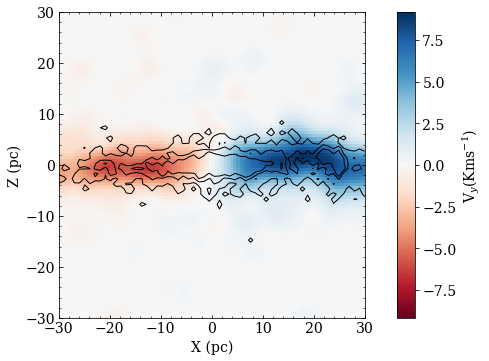

In [11]:
fig = plt.figure()
new_yz, _, _,_ = stats.binned_statistic_2d(new_crop.x_scale, new_crop.z_scale, 
                                           values = new_crop.vy_scale, statistic ='mean', bins = [100, 100])

new_yz = np.nan_to_num(new_yz, nan=0.0)
counts,xbins,ybins = np.histogram2d(new_crop.x_scale, new_crop.z_scale, bins = i*2, weights = new_crop.mass)


new_yz = gaussian_filter(new_yz, sigma=3)

# make sure the colour bar is symmetrical
v_limits = np.max([abs(np.min(new_yz)),np.max(new_yz)])

gs = gridspec.GridSpec(1, 2, width_ratios=[1,0.05])  
cbax = plt.subplot(gs[0,-1])
gamma = 0.1

ax0 = plt.subplot(gs[0,0])

fig.set_size_inches(6,5)

#vmin=-v_limits, vmax=v_limits,
im = ax0.imshow(new_yz.T, origin='lower', cmap=cm, extent=[-i, i, -i, i], vmin = -v_limits, vmax = v_limits)

cb = Colorbar(ax = cbax, mappable = im)


# make the contour plot
mylevels=[1e3, 5e3, 1e4]
ax0.contour(counts.transpose(),mylevels,extent=[xbins.min(),xbins.max(),
    ybins.min(),ybins.max()],linewidths=1,colors='black',
    linestyles='solid')

gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.0, hspace=0.0)   
ax0.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.set_xlabel('X (pc)')
ax0.set_ylabel('Z (pc)')
cb.set_label(r'V$_y$(Kms$^{-1}$)')
plt.savefig("rotation_map", bbox_inches='tight', dpi = 300)
plt.show()

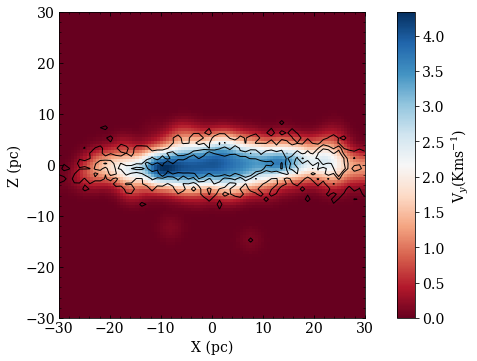

In [13]:
fig = plt.figure()
new_yz, _, _,_ = stats.binned_statistic_2d(new_crop.x_scale, new_crop.z_scale, 
                                           values = new_crop.vy_scale, statistic ='std', bins = [100, 100])

new_yz = np.nan_to_num(new_yz, nan=0.0)
counts,xbins,ybins = np.histogram2d(new_crop.x_scale, new_crop.z_scale, bins = i*2, weights = new_crop.mass)


new_yz = gaussian_filter(new_yz, sigma=3)

# make sure the colour bar is symmetrical
#v_limits = np.max([abs(np.min(new_yz)),np.max(new_yz)])

gs = gridspec.GridSpec(1, 2, width_ratios=[1,0.05])  
cbax = plt.subplot(gs[0,-1])
gamma = 0.1

ax0 = plt.subplot(gs[0,0])

fig.set_size_inches(6,5)

#vmin=-v_limits, vmax=v_limits,
im = ax0.imshow(new_yz.T, origin='lower', cmap=cm, extent=[-i, i, -i, i])

cb = Colorbar(ax = cbax, mappable = im)


# make the contour plot
mylevels=[1e3, 5e3, 1e4]
ax0.contour(counts.transpose(),mylevels,extent=[xbins.min(),xbins.max(),
    ybins.min(),ybins.max()],linewidths=1,colors='black',
    linestyles='solid')

gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.0, hspace=0.0)   
ax0.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.set_xlabel('X (pc)')
ax0.set_ylabel('Z (pc)')
cb.set_label(r'V$_y$(Kms$^{-1}$)')
plt.savefig("rotation_map", bbox_inches='tight', dpi = 300)
plt.show()